In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from datetime import date, datetime

from sklearn.metrics import confusion_matrix
from sklearn.metrics import normalized_mutual_info_score, mutual_info_score
from sklearn.feature_selection import mutual_info_regression

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression

from sklearn.pipeline import Pipeline

from matplotlib import colors
import seaborn as sns


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers

In [76]:
sns.set_style("whitegrid")

In [2]:
str_state = 'GA'
file = 'agent_comments_sales_'+str_state


In [196]:
df_sales_predictors = pd.read_feather(file + '_model01.fea') 
df_Predictand = pd.read_feather(file + '_predictand.fea') 

In [197]:
predictor_array.shape

(534378, 3)

In [219]:
predictor_array = df_sales_predictors.to_numpy()
#predictor_array = predictor_array[:, -3:]
transform_predictors = MinMaxScaler(feature_range=(-6, 6)).fit(predictor_array)
predictor_array_transformed = transform_predictors.transform(predictor_array)
#predictor_array_transformed2 = transform_predictors.transform(predictor_array)
#predictor_array_transformed = predictor_array

In [220]:
type(predictor_array_transformed)

numpy.ndarray

In [221]:
predictor_array.shape

(534378, 91)

In [222]:
print(len(df_sales_predictors.columns))

91


In [223]:
Predictand = df_Predictand['Transprice'].values

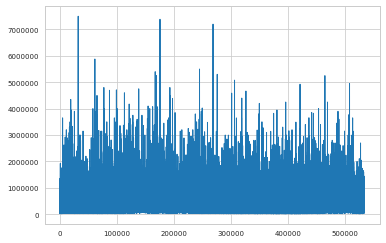

In [224]:
plt.plot(Predictand)

In [225]:
transform_predictand = MinMaxScaler(feature_range=(0, 1)).fit(Predictand.reshape(-1, 1))
Predictand_transformed = transform_predictand.transform(Predictand.reshape(-1, 1))

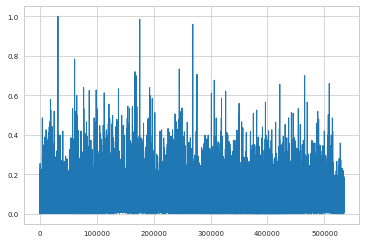

In [226]:
plt.plot(Predictand_transformed)

In [227]:

#cov_2 = np.dot (predictor_array_transformed, predictor_array_transformed.T)
#print(cov_2.shape)


In [232]:
predictor_array_transformed.shape

(534378, 91)

In [233]:
Predictand_transformed.shape

(534378, 1)

In [234]:
from sklearn.model_selection import train_test_split

In [235]:
train_samples = 300_000  # Samples used for training the models
X_train, X_test, y_train, y_test = train_test_split(
    predictor_array_transformed,
    Predictand_transformed,
    shuffle=False,
    test_size=len(Predictand_transformed) - train_samples,
)

In [263]:
# Model definition

model_NN_Class = keras.Sequential()
model_NN_Class.add(keras.layers.Dense(40, activation='sigmoid', input_dim=91))
model_NN_Class.add(keras.layers.Dense(1, activation='sigmoid'))


In [264]:
model_NN_Class.compile(loss='mse', optimizer='adam')

In [265]:
fit_history = model_NN_Class.fit(X_train, y_train, epochs=50, batch_size= 100)

Epoch 1/50
3000/3000 [==============================] - 9s 3ms/step - loss: 0.0012
Epoch 2/50
3000/3000 [==============================] - 9s 3ms/step - loss: 2.2596e-04
Epoch 3/50
3000/3000 [==============================] - 9s 3ms/step - loss: 1.1670e-04
Epoch 4/50
3000/3000 [==============================] - 9s 3ms/step - loss: 1.0521e-04
Epoch 5/50
3000/3000 [==============================] - 9s 3ms/step - loss: 9.9433e-05
Epoch 6/50
3000/3000 [==============================] - 9s 3ms/step - loss: 9.6323e-05
Epoch 7/50
3000/3000 [==============================] - 9s 3ms/step - loss: 9.6166e-05
Epoch 8/50
3000/3000 [==============================] - 9s 3ms/step - loss: 9.5718e-05
Epoch 9/50
3000/3000 [==============================] - 9s 3ms/step - loss: 9.4384e-05
Epoch 10/50
3000/3000 [==============================] - 9s 3ms/step - loss: 9.3163e-05
Epoch 11/50
3000/3000 [==============================] - 9s 3ms/step - loss: 9.3876e-05
Epoch 12/50
3000/3000 [======================

In [266]:
predictions = model_NN_Class.predict(X_train)

In [267]:
#predictions = (predictions - predictions.min())
#predictions = predictions/(predictions.max()) *2. -1

In [268]:
predictions.shape

(300000, 1)

In [269]:
y_train.shape

(300000, 1)

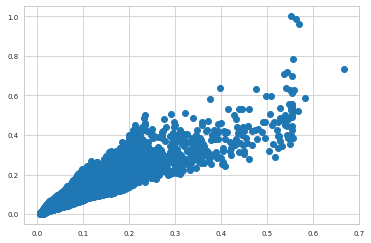

In [270]:
plt.plot(predictions.reshape(len(y_train)), y_train.reshape(len(y_train)),'o')
#plt.plot(y_train.reshape(len(y_train)), y_train.reshape(len(y_train)))

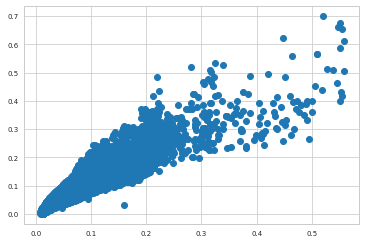

In [271]:
predictions_test = model_NN_Class.predict(X_test)
plt.plot(predictions_test.reshape(len(y_test)), y_test.reshape(len(y_test)),'o')

In [272]:
X_test2 = X_test

In [273]:
X_test2.shape

(234378, 91)

In [274]:
X_test2[:, 0:89] = 0

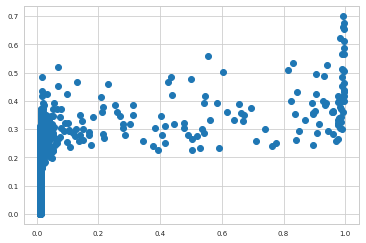

In [275]:

plt.plot(model_NN_Class.predict(X_test2).reshape(len(y_test)), y_test.reshape(len(y_test)),'o')

In [276]:
X_test3 = X_test

In [277]:
X_test3[:, 89] = 0

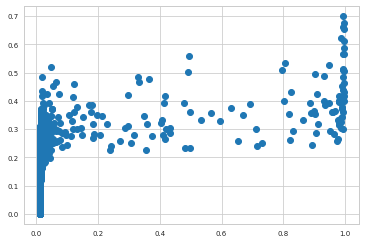

In [278]:

plt.plot(model_NN_Class.predict(X_test3).reshape(len(y_test)), y_test.reshape(len(y_test)),'o')

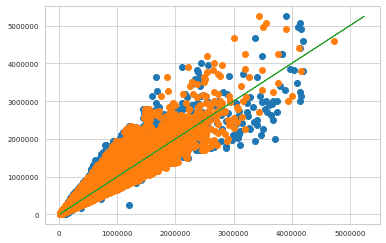

In [281]:
plt.plot(transform_predictand.inverse_transform(predictions_test), 
         transform_predictand.inverse_transform(y_test),'o')

plt.plot(transform_predictors.inverse_transform(X_test)[:,-1], 
         transform_predictand.inverse_transform(y_test),'o')

plt.plot(transform_predictand.inverse_transform(y_test),transform_predictand.inverse_transform(y_test))

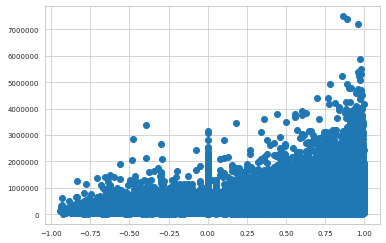

In [283]:
plt.plot(predictor_array[:,0],Predictand,'o')

In [280]:
X_test

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -5.89223773],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -5.61890317],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -5.60721625],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -5.66719038],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -5.58356819],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -5.58990801]])

In [30]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)